# Covid-19_Outcome-Prediction

## Import the Libraries

In [87]:
#import libraries
import pandas as pd
import numpy as np
import seaborn as sns
from sklearn.feature_selection import mutual_info_classif
import matplotlib
import matplotlib.pyplot as plt
%matplotlib inline

In [88]:
# read the dataset
df = pd.read_csv('data.csv',index_col=[0])
df.head(6)

,location,country,gender,age,vis_wuhan,from_wuhan,symptom1,symptom2,symptom3,symptom4,symptom5,symptom6,diff_sym_hos,result
0,104,8,1,66.0,1,0,14,31,19,12,3,1,8,1
1,101,8,0,56.0,0,1,14,31,19,12,3,1,0,0
2,137,8,1,46.0,0,1,14,31,19,12,3,1,13,0
3,116,8,0,60.0,1,0,14,31,19,12,3,1,0,0
4,116,8,1,58.0,0,0,14,31,19,12,3,1,0,0
5,23,8,0,44.0,0,1,14,31,19,12,3,1,0,0


In [89]:
# get the dimensions of the dataset
df.shape

(863, 14)

In [90]:
# find the data types of the attributes
df.dtypes

location          int64
country           int64
gender            int64
age             float64
vis_wuhan         int64
from_wuhan        int64
symptom1          int64
symptom2          int64
symptom3          int64
symptom4          int64
symptom5          int64
symptom6          int64
diff_sym_hos      int64
result            int64
dtype: object

In [91]:
# concise summary of the data
df.describe()

,location,country,gender,age,vis_wuhan,from_wuhan,symptom1,symptom2,symptom3,symptom4,symptom5,symptom6,diff_sym_hos,result
count,863.000000,863.000000,863.000000,863.000000,863.000000,863.000000,863.00000,863.000000,863.000000,863.000000,863.000000,863.000000,863.000000,863.000000
mean,76.645423,16.995365,0.849363,49.400000,0.181924,0.107764,12.13905,28.002317,18.298957,11.840093,2.993048,0.998841,0.995365,0.125145
std,39.200264,7.809951,0.726062,15.079203,0.386005,0.310261,3.99787,7.473231,2.864064,1.183771,0.127251,0.034040,2.358767,0.331075
min,0.000000,0.000000,0.000000,2.000000,0.000000,0.000000,0.00000,0.000000,0.000000,0.000000,0.000000,0.000000,-5.000000,0.000000
25%,45.000000,11.000000,0.000000,40.000000,0.000000,0.000000,14.00000,31.000000,19.000000,12.000000,3.000000,1.000000,0.000000,0.000000
50%,87.000000,18.000000,1.000000,49.400000,0.000000,0.000000,14.00000,31.000000,19.000000,12.000000,3.000000,1.000000,0.000000,0.000000
75%,110.000000,24.000000,1.000000,57.000000,0.000000,0.000000,14.00000,31.000000,19.000000,12.000000,3.000000,1.000000,1.000000,0.000000
max,138.000000,33.000000,2.000000,96.000000,1.000000,1.000000,24.00000,31.000000,19.000000,12.000000,3.000000,1.000000,15.000000,1.000000


In [92]:
# find if missing values is present
df.isnull().sum()

location        0
country         0
gender          0
age             0
vis_wuhan       0
from_wuhan      0
symptom1        0
symptom2        0
symptom3        0
symptom4        0
symptom5        0
symptom6        0
diff_sym_hos    0
result          0
dtype: int64

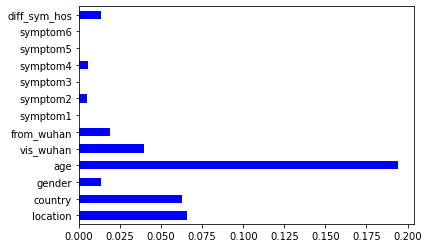

In [93]:
features = df.drop(columns=['result'])
value = df['result']
importances = mutual_info_classif(features , value)
feat_importances = pd.Series(importances, df.columns[0:len(df.columns)-1])
feat_importances.plot(kind='barh', color = 'blue')
plt.show()

<AxesSubplot:xlabel='result', ylabel='count'>

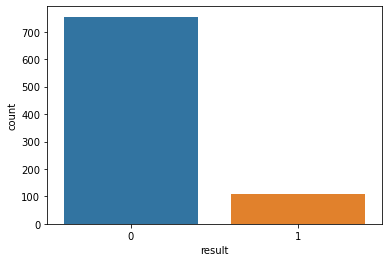

In [94]:
# get the distribution of the target variable
sns.countplot(x="result", data = df)

#### The result show that te number of people that recovered is much greater than the people that died

<AxesSubplot:xlabel='age', ylabel='Count'>

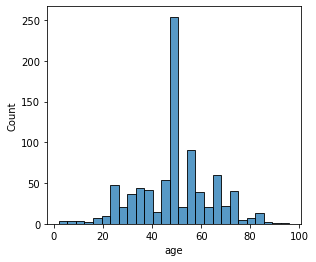

In [95]:
#Plot count of people infected with the age
f = plt.figure(figsize=(10,4))
f.add_subplot(1,2,1)
sns.histplot(df['age'])

#### People between the age fo 40 to 60 is the most people infected with corona virus

In [96]:
#one hot encoding data frame
one_hot_encoded_data = pd.get_dummies(df, columns = ['location', 'country', 'gender', 
                                                     'symptom1','symptom2','symptom3','symptom4',
                                                     'symptom5'])
new_df = one_hot_encoded_data

# Modelling with Naive Bayes

In [97]:
#Import libraries
from sklearn.model_selection import train_test_split
from sklearn.naive_bayes import GaussianNB
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import precision_score, recall_score, f1_score, accuracy_score 
from sklearn import metrics
from sklearn.metrics import accuracy_score
from sklearn.metrics import classification_report, confusion_matrix
from sklearn.metrics import roc_auc_score
from sklearn.metrics import roc_curve

In [98]:
#Split Data into training and testing set
xdat = new_df.drop(columns=['result'])
ydat = new_df['result']
xtr,xts,ytr,yts = train_test_split(xdat, ydat, test_size=0.3, random_state = 0)
print('Training set shape: ', xtr.shape, ytr.shape)
print('Testing set shape: ', xts.shape, yts.shape)

Training set shape:  (604, 275) (604,)
Testing set shape:  (259, 275) (259,)


In [99]:
# Initialize classifier:
nb = GaussianNB()
# fit the model
nb.fit(xtr, ytr)
# Predict data with classifier: 
pred_y = nb.predict(xts)
#Print accuracy score
print('Accuracy score: {0:0.4f}'. format(accuracy_score(yts, pred_y)))

Accuracy score: 0.5019


### Accuracy score is low and not valid so we need to tuning

In [100]:
options = [
            {'var_smoothing': np.logspace(-25,0,105),
             'priors':[[0.4,0.6],[0.6,0.4],[0.7,0.3],[0.8,0.2]]
            }
          ]

gg = GridSearchCV(GaussianNB(), param_grid = options, cv = 10, verbose=True, n_jobs=-1)
tuning = gg.fit(xtr,ytr)
tuning.best_estimator_

Fitting 10 folds for each of 420 candidates, totalling 4200 fits


GaussianNB(priors=[0.8, 0.2], var_smoothing=0.03611538988740117)

In [101]:
#Classifier:
gnb = GaussianNB(priors=[0.8, 0.2], var_smoothing=0.03611538988740117)
# fit the model
gnb.fit(xtr, ytr)
# Predict data with classifier: 
pred_y = gnb.predict(xts)
#Print accuracy score
print('Accuracy score: {0:0.4f}'. format(accuracy_score(yts, pred_y)))

Accuracy score: 0.9035


In [102]:
#Performance Classifiers
yts_score=gnb.predict_proba(xts)
print('Precision: %.3f' % precision_score(yts, pred_y))
print('Recall: %.3f' % recall_score(yts, pred_y))
print('F1 Score: %.3f' % f1_score(yts, pred_y))
print('roc_auc_score: %.3f '% roc_auc_score(yts, yts_score[:,1]))

Precision: 0.688
Recall: 0.595
F1 Score: 0.638
roc_auc_score: 0.917 


In [103]:
print(classification_report(yts, pred_y))
print('roc_auc_score: %.3f '% roc_auc_score(yts, yts_score[:,1]))

              precision    recall  f1-score   support

           0       0.93      0.95      0.94       222
           1       0.69      0.59      0.64        37

    accuracy                           0.90       259
   macro avg       0.81      0.77      0.79       259
weighted avg       0.90      0.90      0.90       259

roc_auc_score: 0.917 


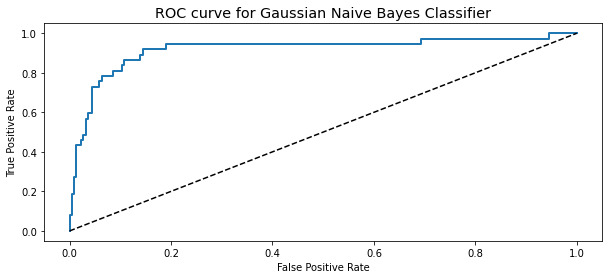

In [104]:
# plot ROC Curve
fpr, tpr, thresholds = roc_curve(yts, yts_score[:,1])
plt.figure(figsize=(10,4))
plt.plot(fpr, tpr, linewidth=2)
plt.plot([0,1], [0,1], 'k--' )
plt.rcParams['font.size'] = 12
plt.title('ROC curve for Gaussian Naive Bayes Classifier')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.show()

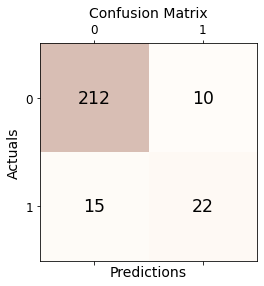

In [105]:
#Plot Confusion Matrix
cm = confusion_matrix(yts, pred_y)
fig, ax = plt.subplots(figsize=(10, 4))
ax.matshow(cm, cmap=plt.cm.Oranges, alpha=0.3)
for i in range(cm.shape[0]):
    for j in range(cm.shape[1]):
        ax.text(x=j, y=i,s=cm[i, j], va='center', ha='center', size='x-large')
plt.xlabel('Predictions', fontsize=14)
plt.ylabel('Actuals', fontsize=14)
plt.title('Confusion Matrix', fontsize=14)
plt.show()

#### True Positives = 213, True Negatives = 22, False Positives = 9, False Negatives = 15.

In [106]:
#Inntialize TP, TN, FP, AND FN
TP = cm[0,0]
TN = cm[1,1]
FP = cm[0,1]
FN = cm[1,0]

In [107]:
#Calculating Accuracy of the model using the confusion matrix
classify_accuracy = (TP + TN) / float(TP + TN + FP + FN)
classify_error = (FP + FN) / float(TP + TN + FP + FN)
precision = TP / float(TP + FP)
recall = TP / float(TP + FN)
true_positive_rate = TP / float(TP + FN)
false_positive_rate = FP / float(FP + TN)
specificity = TN / (TN + FP)
# print classification accuracy, 
print('Classification accuracy : {0:0.4f}'.format(classify_accuracy))
print('Classification error : {0:0.4f}'.format(classify_error))
print('Precision : {0:0.4f}'.format(precision))
print('Recall or Sensitivity : {0:0.4f}'.format(recall))
print('True Positive Rate : {0:0.4f}'.format(true_positive_rate))
print('False Positive Rate : {0:0.4f}'.format(false_positive_rate))
print('Specificity : {0:0.4f}'.format(specificity))

Classification accuracy : 0.9035
Classification error : 0.0965
Precision : 0.9550
Recall or Sensitivity : 0.9339
True Positive Rate : 0.9339
False Positive Rate : 0.3125
Specificity : 0.6875
